In [99]:
# Solving xor problem
# 1 1 = 0
# 0 1 = 1
# 1 0 = 1
# 0 0 = 0

In [100]:
import numpy as np
import matplotlib.pyplot as pl
from 

In [101]:
# Activation Function
def sigmoid(x):
    return 1/(1+np.exp(-x ))

In [102]:
# Sigmoid derivatives
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [103]:
# Forward Function
# Here np.matmul() and np.dot() is same
def forward(x,w1,w2,predict=False):
    a1=np.matmul(x,w1)
    z1=sigmoid(a1)
#   Create and add Bias
    bias=np.ones((len(z1),1))
    z1=np.concatenate((bias,z1),axis=1)
    a2=np.matmul(z1,w2)
    z2=sigmoid(a2)
    if predict:
        return z2
    return a1,z1,a2,z2

In [104]:
def back_prop(a1,z0,z1,z2,y):
    delta2=z2-y
    Delta2=np.matmul(z1.T,delta2)
    delta1=(delta2.dot(w2[1:,:].T)*sigmoid_derivative(a1))
    Delta1=np.matmul(z0.T,delta1)
    return delta2,Delta1,Delta2

In [105]:
# first column is Bias


array([[1, 1, 0],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 1]])

In [106]:
# Output label
y=np.array([[1],[1],[0],[0]])
y

array([[1],
       [1],
       [0],
       [0]])

In [107]:
# initialize weights
np.random.seed(1)
w1=np.random.randn(3,5)
w2=np.random.randn(6,1)
print(w1)
print(w2)

[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
 [-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944]]
[[-1.09989127]
 [-0.17242821]
 [-0.87785842]
 [ 0.04221375]
 [ 0.58281521]
 [-1.10061918]]


In [109]:
for i in range(epochs):
    a1,z1,a2,z2=forward(x,w1,w2)
    delta2,Delta1,Delta2=back_prop(a2,x,z1,z2,y)
    w1-=lr*(1/m)*Delta1
    w2-=lr*(1/m)*Delta2
    c=np.mean(np.abs(delta2))
    costs.append(c)
    if i%1000==0:
        print(f"Iteration:{i}.Error:{c}")
print("Training complete")
print(w1,w2)

Iteration:0.Error:0.5018721437293049
Iteration:1000.Error:0.48070161499227126
Iteration:2000.Error:0.48342775757060497
Iteration:3000.Error:0.482892326359894
Iteration:4000.Error:0.47769031498006786
Iteration:5000.Error:0.4722496858788187
Iteration:6000.Error:0.4668996057701478
Iteration:7000.Error:0.4616329322502836
Iteration:8000.Error:0.4564396679732647
Iteration:9000.Error:0.451313812135239
Training complete
[[ 1.94190421 -0.98321005 -0.59989223 -1.20991133  0.73992099]
 [-1.13554533  0.66430728 -1.16627889 -0.69741667 -0.34279973]
 [ 0.16636507 -0.87674138  0.22747251  1.04967154  1.07185537]] [[ 0.21168513]
 [-3.22154851]
 [ 5.50380232]
 [ 2.34775254]
 [ 6.53981415]
 [-2.12989764]]


In [110]:
z3=forward(x,w1,w2,True)
print("Percentages:")
print(z3)
print("Prediction:")
print(np.round(z3))

Percentages:
[[0.55377446]
 [0.55376116]
 [0.44647144]
 [0.44607273]]
Prediction:
[[1.]
 [1.]
 [0.]
 [0.]]


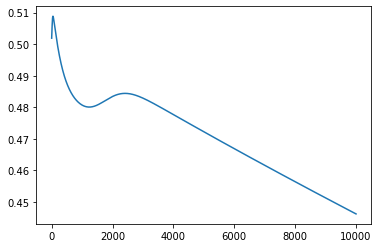

In [111]:
pl.plot(costs)
pl.show()